<h1 align="center">
  <a href="https://www.nlga.niedersachsen.de/startseite">
    <img width="300" src="https://www.nlga.niedersachsen.de/assets/image/246974" alt="NLGA">
  </a>
</h1>

## Final visualization of the comparison between different LLM providers

**Overview**: In this notebook, we will load the results of the experiments conducted on the NLGA dataset and visualize the comparison between the responses generated by the several LLMs. We will also display the average scores of the evaluation metrics for each model.

### Install Dependencies

In [29]:
# %pip install pandas matplotlib

  Using cached cycler-0.12.1-py3-none-any.whl.metadata (3.8 kB)
     ---------------------------------------- 0.0/162.8 kB ? eta -:--:--
     -------------------------------------- 162.8/162.8 kB 4.9 MB/s eta 0:00:00
  Using cached kiwisolver-1.4.5-cp311-cp311-win_amd64.whl.metadata (6.5 kB)
   ---------------------------------------- 0.0/7.7 MB ? eta -:--:--
   - -------------------------------------- 0.3/7.7 MB 8.6 MB/s eta 0:00:01
   -- ------------------------------------- 0.6/7.7 MB 7.1 MB/s eta 0:00:02
   ---- ----------------------------------- 0.9/7.7 MB 6.8 MB/s eta 0:00:01
   ------ --------------------------------- 1.2/7.7 MB 6.7 MB/s eta 0:00:01
   ------- -------------------------------- 1.4/7.7 MB 6.5 MB/s eta 0:00:01
   --------- ------------------------------ 1.7/7.7 MB 6.5 MB/s eta 0:00:01
   ---------- ----------------------------- 2.0/7.7 MB 6.5 MB/s eta 0:00:01
   ------------ --------------------------- 2.3/7.7 MB 6.4 MB/s eta 0:00:01
   ------------- -------------

In [3]:
import os
import json
from dotenv import load_dotenv
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
load_dotenv()

CONFIG = {
    "RESULTS_DIR": "./results/",
}

file_names = [
    'gpt_35_vs_luminous_supreme_experiment.jsonl',
    # 'llm_AA_vs_openai_experiment_small.jsonl',
    'nous_hermes_2_mixtral_8x7b_dpo_vs_luminous_supreme_experiment.jsonl',
    'mixtral_8x7b_instruct_v0.1_vs_luminous_supreme_experiment.jsonl',
    'meta_llama_3_8b_instruct_vs_luminous_supreme_experiment.jsonl',
    'gpt_4_vs_luminous_supreme_experiment.jsonl',
    
]

In [20]:
def load_and_merge_jsonl(files, results_dir):
    dataframes = []
    
    for file_name in files:
        file_path = os.path.join(results_dir, file_name)
        df = pd.read_json(file_path, lines=True)
        dataframes.append(df)
    
    if dataframes:
        print(f"Loaded {len(dataframes)} files. Merging...")
        combined_df = pd.concat(dataframes, ignore_index=True)
        return combined_df
    else:
        print("No files loaded. Returning empty DataFrame.")
        return pd.DataFrame()


combined_df = load_and_merge_jsonl(file_names, CONFIG['RESULTS_DIR'])
combined_df

Loaded 5 files. Merging...


,question,ground_truth_model_gpt-35-turbo-16k-deployment,ground_truth_model_luminous-supreme-control,score_factual_accuracy_model_gpt-35-turbo-16k-deployment,score_factual_accuracy_model_luminous-supreme-control,context_model_gpt-35-turbo-16k-deployment,context_model_luminous-supreme-control,explanation_response_conciseness_model_gpt-35-turbo-16k-deployment,explanation_response_conciseness_model_luminous-supreme-control,score_valid_response_model_gpt-35-turbo-16k-deployment,...,score_valid_response_model_gpt4,context_model_gpt4,score_response_conciseness_model_gpt4,score_response_match_precision_model_gpt4,explanation_response_matching_model_gpt4,score_response_completeness_wrt_context_model_gpt4,explanation_response_relevance_model_gpt4,score_response_match_model_gpt4,score_Strict_Context_adherence_model_gpt4,explanation_Strict_Context_adherence_model_gpt4
0,Wie kann ich mich vor Legionellen schützen?,"Kaltes Wasser muss kalt sein, d.h. < 20 °C \n ...","Kaltes Wasser muss kalt sein, d.h. < 20 °C \n ...",0.90,NaN,[Doc Nr. 1]\nLegionellen\nVorkommen und\nVerme...,[Doc Nr. 1]\nLegionellen\nVorkommen und\nVerme...,"{\n ""Reasoning"": ""The response provides rel...","{\n ""Reasoning"": ""The response does not con...",1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Warum heißen Legionellen so?,Im Juni 1976 erkrankten 221 Teilnehmer eines T...,Im Juni 1976 erkrankten 221 Teilnehmer eines T...,1.00,0.6,[Doc Nr. 1]\nJedoch sind kranke und ältere Men...,[Doc Nr. 1]\nJedoch sind kranke und ältere Men...,"{\n ""Reasoning"": ""The response directly ans...","{\n ""Reasoning"": ""The response accurately e...",1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Was sind Anzeichen für Borreliose?,Wanderröte in etwa 50 % der Fälle: \n nach ein...,Wanderröte in etwa 50 % der Fälle: \n nach ein...,1.00,1.0,[Doc Nr. 1]\nRisiko Zeckenstich\nBorreliose\nW...,[Doc Nr. 1]\nRisiko Zeckenstich\nBorreliose\nW...,"{\n ""Reasoning"": ""The response accurately p...","{\n ""Reasoning"": ""The response provides a d...",1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Sind die Lyme-Krankheit und Borreliose das selbe?,Ja. (die durch Bakterien verursachte Borrelios...,Ja. (die durch Bakterien verursachte Borrelios...,0.75,0.8,[Doc Nr. 1]\nDieses Erkrankungsbild besteht in...,[Doc Nr. 1]\nDieses Erkrankungsbild besteht in...,"{\n ""Reasoning"": ""The response accurately a...","{\n ""Reasoning"": ""The response accurately a...",1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Schützt die schnelle Entfernung einer Zecke vo...,Nein/kaum. Im Gegensatz zu der Infektion mit B...,Nein/kaum. Im Gegensatz zu der Infektion mit B...,1.00,1.0,[Doc Nr. 1]\nRisiko Zeckenstich\nFSME\nSchutz ...,[Doc Nr. 1]\nRisiko Zeckenstich\nFSME\nSchutz ...,"{\n ""Reasoning"": ""The response directly ans...","{\n ""Reasoning"": ""The response directly ans...",1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
170,Gibt es eine Impfung gegen Genitalwarzen?,NaN,Ja. Humane Papillomviren (HPV) können sowohl H...,NaN,0.0,NaN,[Doc Nr. 1]\nBei Infektionen beobachtet man zw...,NaN,"{\n ""Reasoning"": ""The response provides a d...",NaN,...,1.0,[Doc Nr. 1]\nBei Infektionen beobachtet man zw...,1.0,0.666667,"Information Recall: 0.8333333333333334{\n ""...",1.0,"Response Precision: 1.0{\n ""Reasoning"": ""Th...",0.784314,1.0,"{\n ""Reasoning"": ""The response strictly adh..."
171,Was sind Nebenwirkungen einer Polio-Impfung?,NaN,Als mögliche Nebenwirkungen können Reaktionen ...,NaN,0.8,NaN,[Doc Nr. 1]\nERKRANKUNG IMPFUNG11Als mögliche ...,NaN,"{\n ""Reasoning"": ""The response provides a d...",NaN,...,1.0,[Doc Nr. 1]\nERKRANKUNG IMPFUNG11Als mögliche ...,1.0,1.000000,"Information Recall: 1.0{\n ""Result"": [\n ...",1.0,"Response Precision: 1.0{\n ""Reasoning"": ""Th...",1.000000,1.0,"{\n ""Reasoning"": ""The given response strict..."
172,Wie wird Borreliose behandelt?,NaN,Die akute Borrelieninfektion kann in vielen Fä

In [ ]:
# combined_df.select(pl.col("question"), pl.col("response_model_gpt-35-turbo-16k-deployment"), pl.col("explanation_response_matching_model_luminous-supreme-control"))

In [23]:
def display_average_scores(df: pd.DataFrame):
    score_columns = [col for col in df.columns if 'score' in col]
    data_for_table = []
    
    for column in score_columns:
        average = df[column].dropna().mean()
        parts = column.split('_model_')
        
        if len(parts) != 2:
            print(f"Warning: '{column}' does not follow the expected naming convention.")
            continue
        
        metric_name = parts[0].replace('score_', '').replace('_', ' ').capitalize()
        model_name = parts[1]
        
        data_for_table.append({
            "Model": model_name,
            "Metric": metric_name,
            "Average Score": average
        })
    
    results_table = pd.DataFrame(data_for_table)
    return results_table

In [30]:
avg_scores_df = display_average_scores(combined_df)
avg_scores_df

,Model,Metric,Average Score
0,gpt-35-turbo-16k-deployment,Factual accuracy,0.664506
1,luminous-supreme-control,Factual accuracy,0.545321
2,gpt-35-turbo-16k-deployment,Valid response,0.800000
3,luminous-supreme-control,Valid response,0.597701
4,gpt-35-turbo-16k-deployment,Response conciseness,0.914286
5,luminous-supreme-control,Response conciseness,0.688571
6,gpt-35-turbo-16k-deployment,Response match precision,0.529938
7,luminous-supreme-control,Response match precision,0.390946
8,gpt-35-turbo-16k-deployment,Response relevance,0.733333
9,luminous-supreme-control,Response relevance,0.539048


### Display aggregated metrics by model and by metric

In [32]:
import matplotlib.pyplot as plt

# Step 1: Aggregate Metrics by Model
metrics_by_model = avg_scores_df.groupby('Model')['Average Score'].mean().sort_values(ascending=False)

# Step 2: Aggregate Models by Metric
models_by_metric = avg_scores_df.pivot_table(index='Metric', columns='Model', values='Average Score')

### Aggregated Metrics by Model

In [34]:
metrics_by_model

Model
mistralai/Mixtral-8x7B-Instruct-v0.1           0.714825
meta/meta-llama-3-8b-instruct                  0.688978
gpt4                                           0.682967
NousResearch/Nous-Hermes-2-Mixtral-8x7B-DPO    0.672673
gpt-35-turbo-16k-deployment                    0.648618
luminous-supreme-control                       0.512671
Name: Average Score, dtype: float64

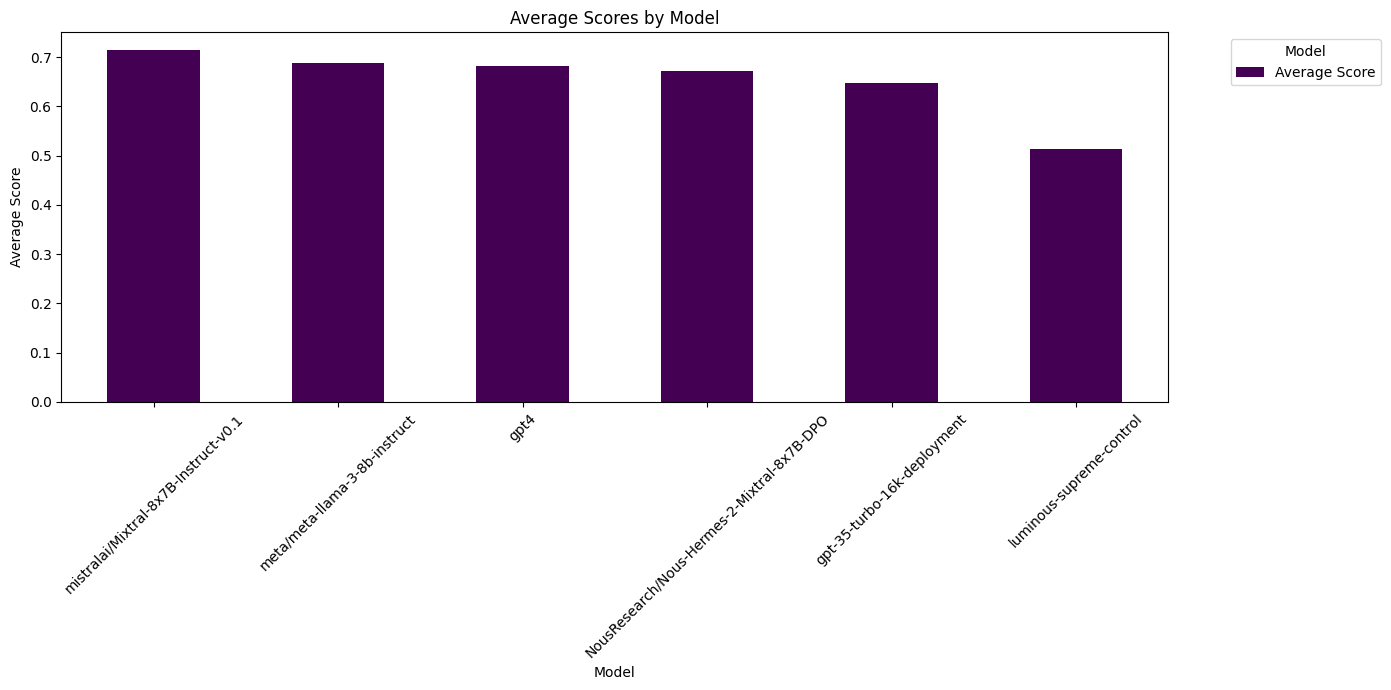

In [33]:
metrics_by_model.plot(kind='bar', figsize=(14, 7), colormap='viridis')
plt.title('Average Scores by Model')
plt.ylabel('Average Score')
plt.xlabel('Model')
plt.xticks(rotation=45)
plt.legend(title='Model', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()

### Models by metric

In [35]:
models_by_metric

Model,NousResearch/Nous-Hermes-2-Mixtral-8x7B-DPO,gpt-35-turbo-16k-deployment,gpt4,luminous-supreme-control,meta/meta-llama-3-8b-instruct,mistralai/Mixtral-8x7B-Instruct-v0.1
Metric,,,,,,
Factual accuracy,0.821101,0.664506,0.864773,0.545321,0.731845,0.701263
Response completeness wrt context,0.885714,0.514286,0.628571,0.411429,0.585714,0.714286
Response conciseness,0.614286,0.914286,0.928571,0.688571,0.942857,0.957143
Response match,0.439537,0.359606,0.435270,0.234748,0.436124,0.458352
Response match precision,0.557380,0.529938,0.563258,0.390946,0.513393,0.417892
Response match recall,0.499673,0.407323,0.492929,0.275240,0.486111,0.536869
Response relevance,0.600000,0.733333,0.604762,0.539048,0.704762,0.790476
Strict context adherence,0.969697,0.914286,0.971429,0.931034,1.000000,0.885714
Valid response,0.666667,0.800000,0.657143,0.597701,0.800000,0.971429


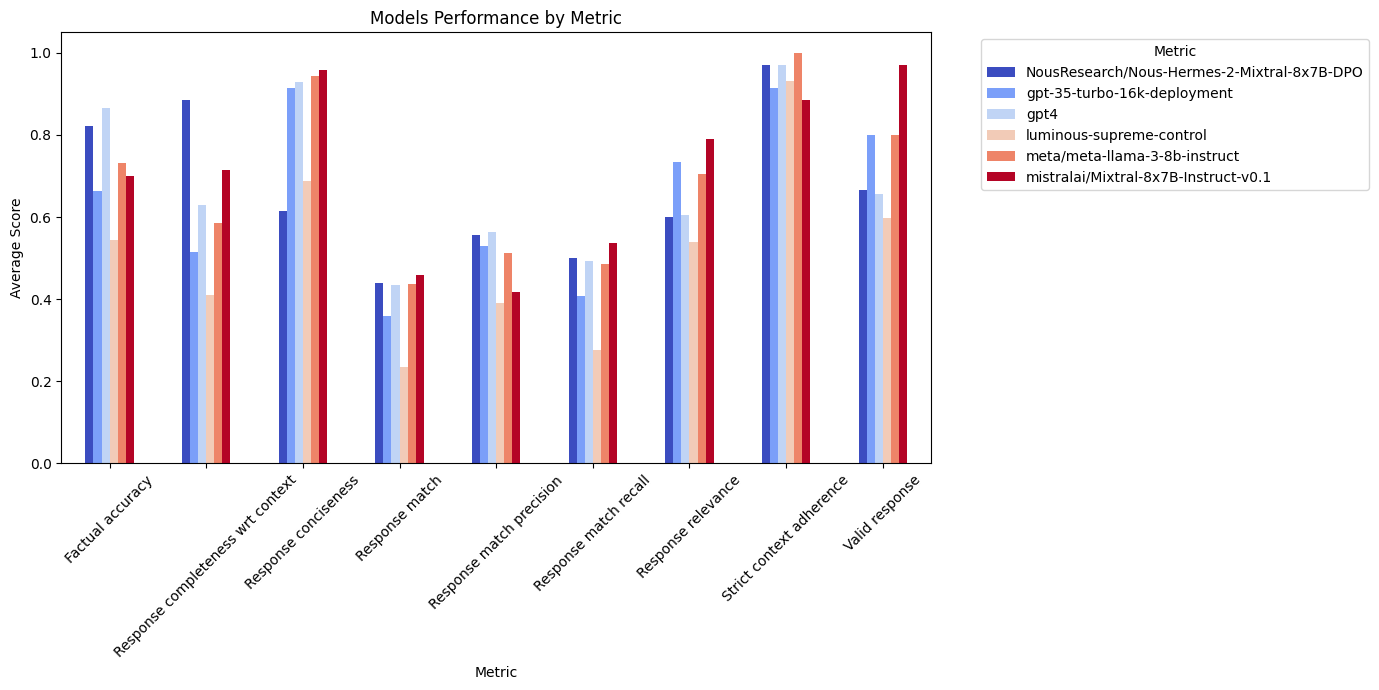

In [36]:
models_by_metric.plot(kind='bar', figsize=(14, 7), colormap='coolwarm')
plt.title('Models Performance by Metric')
plt.ylabel('Average Score')
plt.xlabel('Metric')
plt.xticks(rotation=45)
plt.legend(title='Metric', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()

plt.show()